In [8]:
from bs4  import BeautifulSoup as soup
from urllib.request import urlopen as myReq

historyurl = "https://www.paklap.pk/laptops-prices.html"
uClient = myReq(historyurl)
htmlContent = uClient.read()
uClient.close()
psoup = soup(htmlContent,'html.parser')

containers = psoup.findAll("div",{"class": "item product product-item"})
print(len(containers))

0


In [4]:
print(soup.prettify(containers[0]))
container = containers[0]

<div class="_3etsg">
 <div class="">
  <div class="_18Zzh _2LknN">
   <p class="FYmzo" id="adsResultsIn">
    54,109 ads in
    <!-- -->
    <b>
     Karachi
    </b>
   </p>
   <div class="_23UuD">
    <div class="_2leYF">
     <span class="_2dmxR">
      <span>
       View
      </span>
     </span>
     <button class="rui-3mpO_ rui-KRXqt" data-aut-id="list" role="button" tabindex="0" title="" type="button">
      <svg class="" data-aut-id="icon" fill-rule="evenodd" height="24px" viewbox="0 0 1024 1024" width="24px">
       <path class="rui-77aaa" d="M896 682.667l42.667 42.667-42.667 42.667h-768l-42.667-42.667 42.667-42.667h768zM896 469.333l42.667 42.667-42.667 42.667h-768l-42.667-42.667 42.667-42.667h768zM896 256l42.667 42.667-42.667 42.667h-768l-42.667-42.667 42.667-42.667h768z">
       </path>
      </svg>
     </button>
     <button class="rui-3mpO_ rui-KRXqt" data-aut-id="grid" role="button" tabindex="0" title="" type="button">
      <svg class="" data-aut-id="icon" fill-rule="e

In [ ]:
#productName
title = container.div.img["alt"]
print(title)

#price
price = container.findAll("span",{"s-item__price"})
print(price[0].text)

#shipping
shipping = container.findAll("span",{"s-item__shipping s-item__logisticsCost"})
print(shipping[0].text)

DELL LATiTUDE LAPTOP WINDOWS 10 INTEL CORE 2 DUO DVD WiFi NOTEBOOK HD COMPUTER
$169.99
Free shipping


In [ ]:
records=[]
for container in containers:
  
    title= container.div.img["alt"]
    print(title)
    
    price=container.findAll("span",{"s-item__price"})
    print(price[0].text.strip())
    
    shipping=container.findAll("span",{"s-item__shipping s-item__logisticsCost"})
    print(shipping[0].text)
    
    records.append((title , price[0].text.strip() , shipping[0].text.strip()))

DELL LATiTUDE LAPTOP WINDOWS 10 INTEL CORE 2 DUO DVD WiFi NOTEBOOK HD COMPUTER
$169.99
Free shipping
DELL LAPTOP LATiTUDE WINDOWS 10 CORE 2 DUO 4GB RAM WIN DVD WIFI PC HD COMPUTER
$239.00
Free shipping
Dell Latitude Laptop HD LED Intel Core 2 Duo 4GB RAM DVD-RW WiFi Windows 10
$160.00 to $260.00
Free shipping
HP LAPTOP WINDOWS 10 PC CORE i5 2.4GHz 4GB RAM WiFi DVDRW NOTEBOOK 250GB HD WIN
$289.00
Free shipping
NEW - HP Stream 14" HD Intel N4000 4GB RAM 64GB eMMC Webcam BT Win 10 - Blue
$289.95
Free shipping
Dell Latitude 3350 13.3" Laptop Intel 1.9GHz 4GB RAM 128GB SSD Windows 10 -RR
$144.95
Free shipping
HP 15-BS212WM Notebook 15.6" HD Celeron N4000 1.1GHz 4GB RAM 500GB HDD Win 10
$239.00
Free shipping
Dell Latitude E5400 14" Laptop Intel Core 2 Duo 2.26GHz 2GB 250GB Windows 7
$154.95
Free shipping
Samsung Chromebook XE303C12 11.6in 16GB, Samsung Exynos 5 Dual-Core
$124.99
Free shipping
Dell Latitude Business Gaming Laptop HD Intel Core i5 3.20GHz 16GB RAM 2TB SSD
$311.00 to $687.00
Fr

In [ ]:
import pandas as pd 
df=pd.DataFrame(records , columns=['title' ,'price' , 'shipping'])
df

,title,price,shipping
0,DELL LATiTUDE LAPTOP WINDOWS 10 INTEL CORE 2 D...,$169.99,Free shipping
1,DELL LAPTOP LATiTUDE WINDOWS 10 CORE 2 DUO 4GB...,$239.00,Free shipping
2,Dell Latitude Laptop HD LED Intel Core 2 Duo 4...,$160.00 to $260.00,Free shipping
3,HP LAPTOP WINDOWS 10 PC CORE i5 2.4GHz 4GB RAM...,$289.00,Free shipping
4,"NEW - HP Stream 14"" HD Intel N4000 4GB RAM 64G...",$289.95,Free shipping
...,...,...,...
58,"Lenovo Thinkpad T460 14"" Laptop: 2.6GHz i7-660...",$349.99,Free shipping
59,"Microsoft Surface Pro 7 12.3"" Intel Core i5 8G...",Tap item to see current priceSee price,Free shipping
60,HP Chromebook 11 Laptop Intel 2.16 GHz 2 Memor...,$149.99,Free shipping
61,"Fast Dell Latitude 10.1"" Laptop Computer Windo...",$129.99,Free shipping


In [ ]:
df.to_csv(r"/content/drive/My Drive/data.csv")

In [ ]:
from csv import reader, writer
import matplotlib.pyplot as plt
import seaborn as sns

dr=pd.read_csv(r"/content/drive/My Drive/data.csv" , delimiter=',', quotechar='"',encoding='latin1')
dr.shape

(63, 4)

In [ ]:
dr.shipping.value_counts().head(5)

Free shipping       53
+$15.00 shipping     1
+$79.97 shipping     1
+$10.00 shipping     1
+$16.99 shipping     1
Name: shipping, dtype: int64

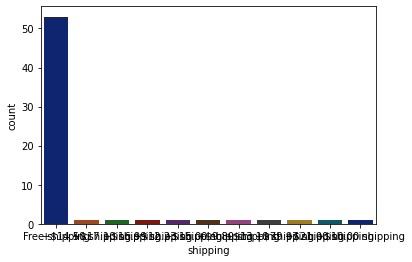

In [ ]:
sns.countplot(x="shipping", data=dr, palette="dark")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, f

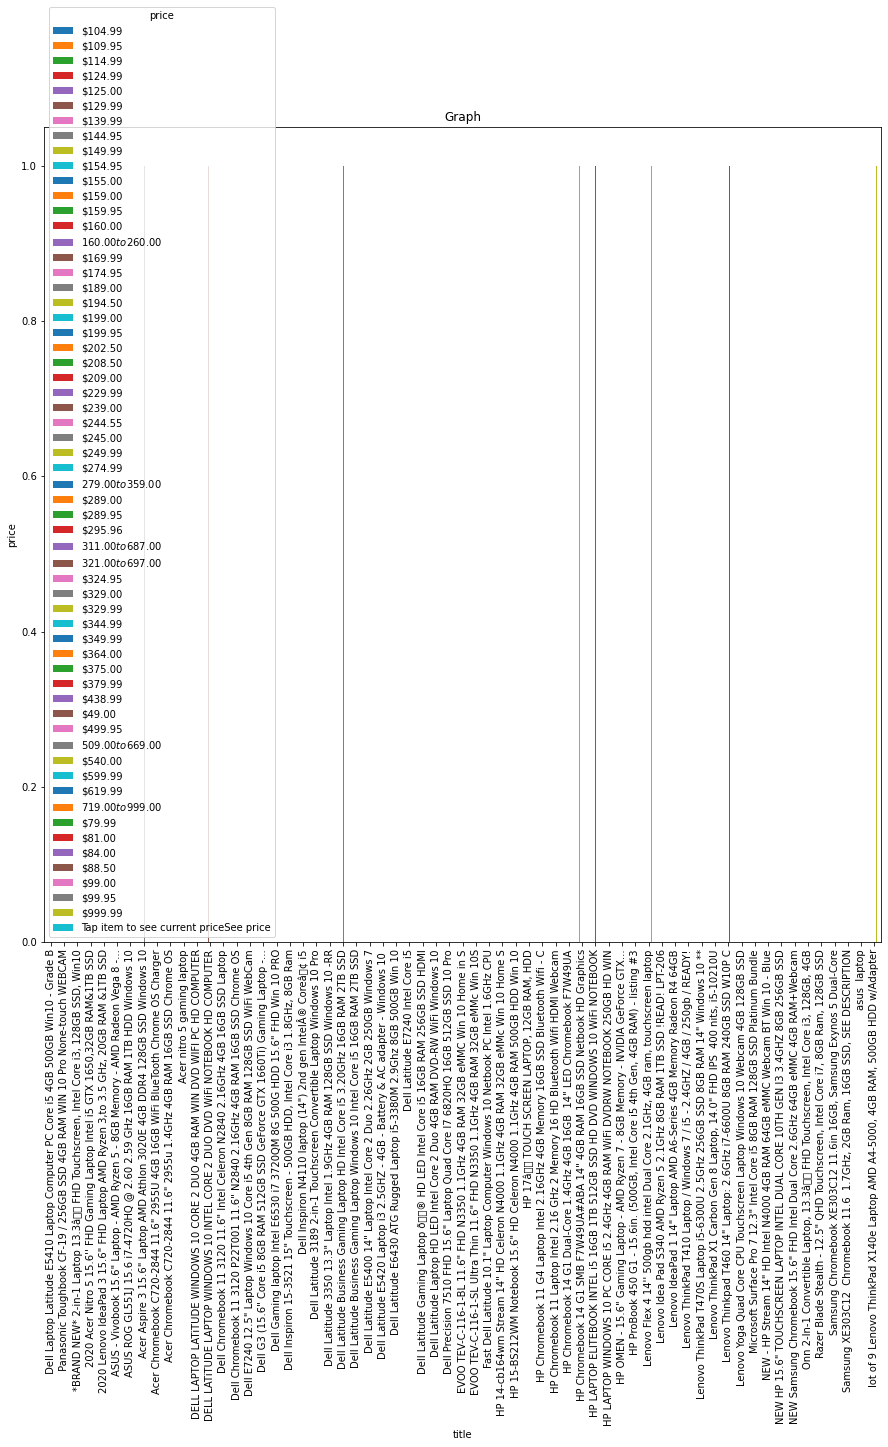

In [ ]:
pd.crosstab(dr.title ,dr.price).plot(kind="bar",figsize=(15,15))

plt.title('Graph')
plt.xlabel('title')
plt.ylabel('price')
plt.show()

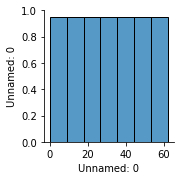

In [ ]:
sns.pairplot(data=dr)
plt.show()